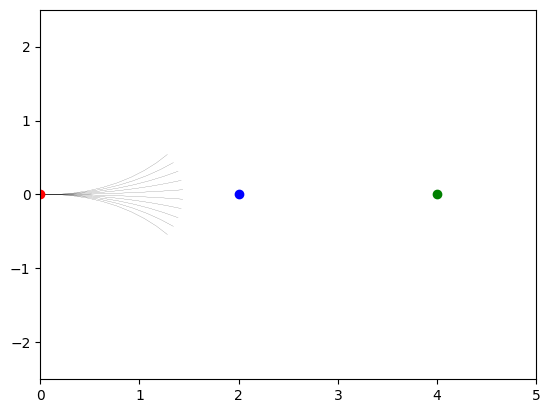

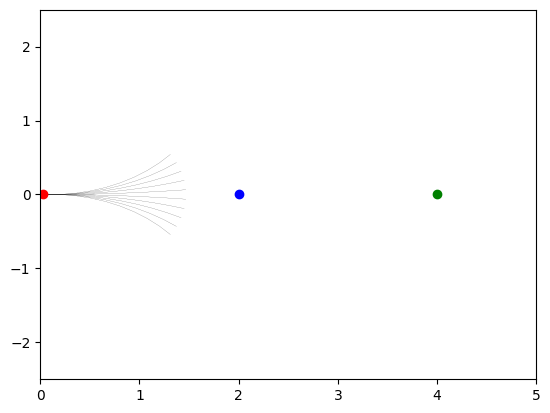

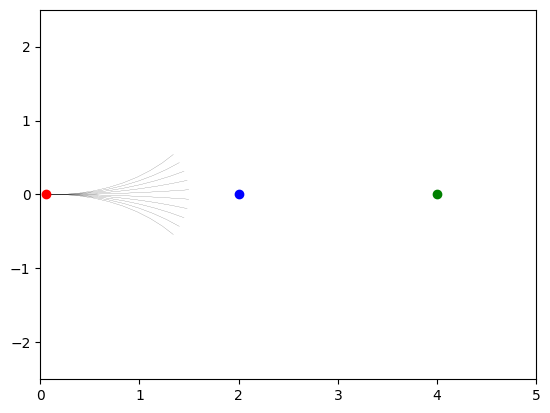

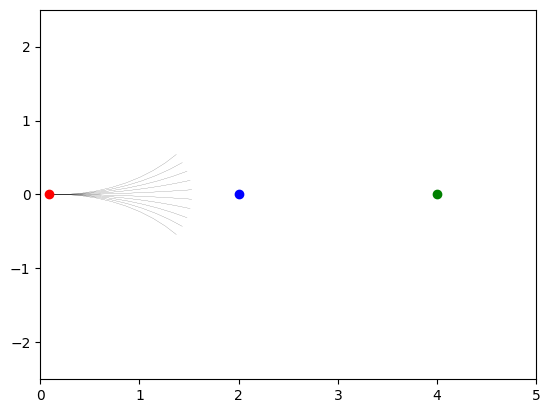

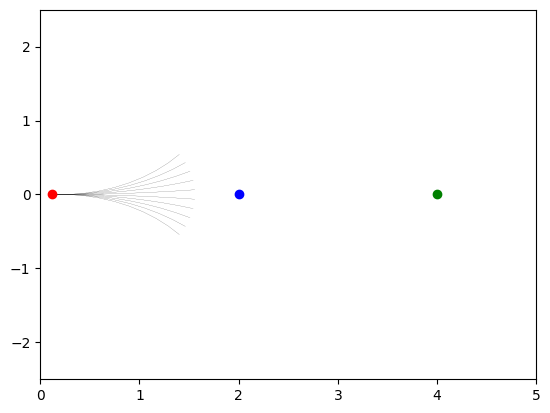

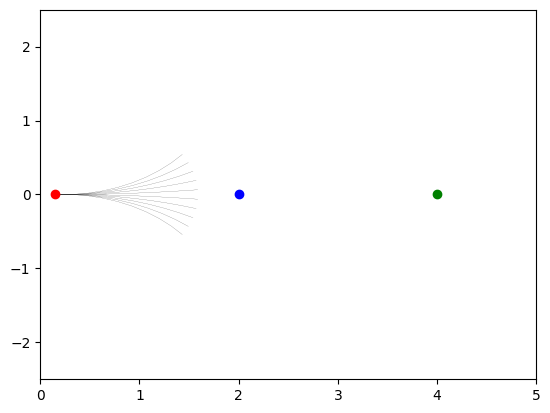

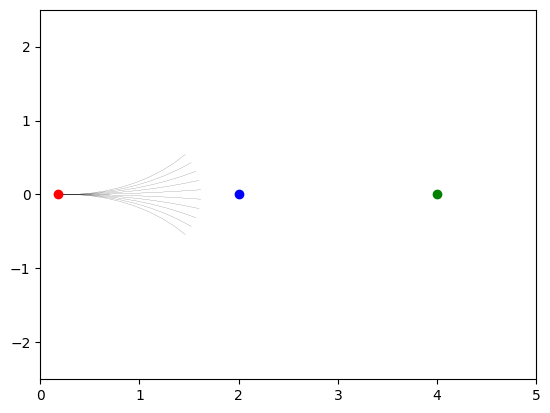

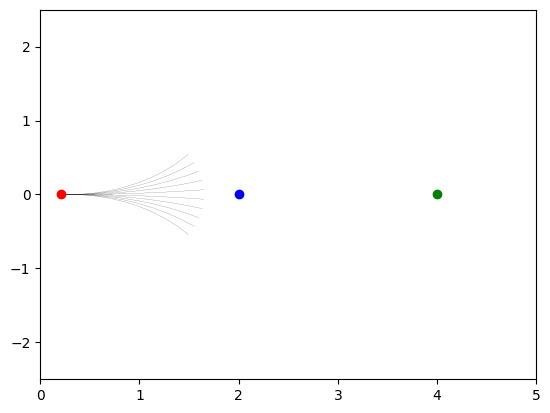

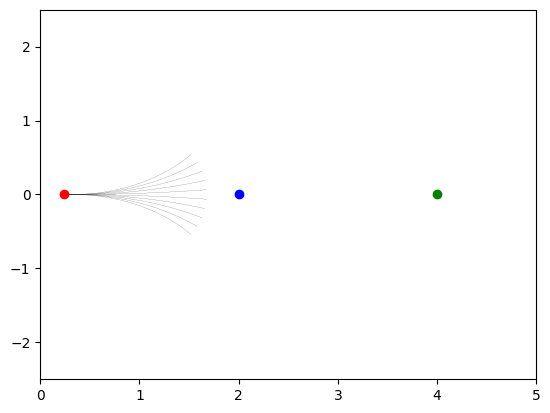

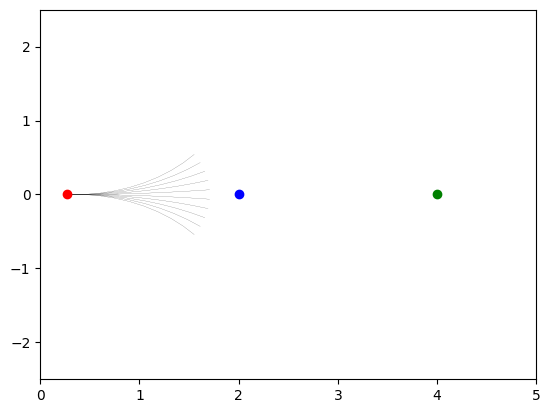

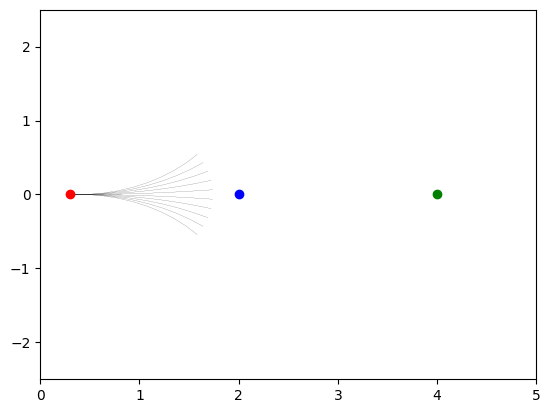

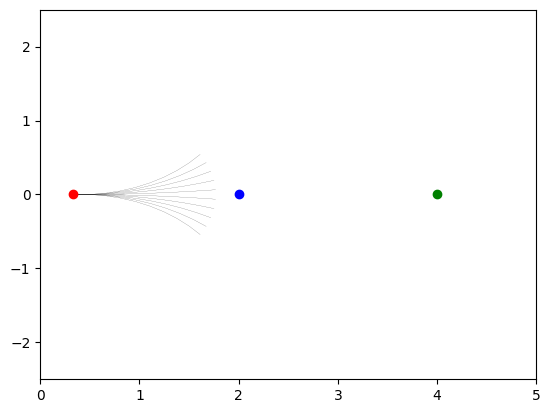

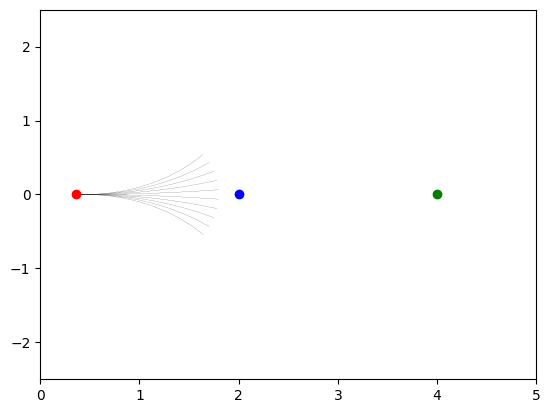

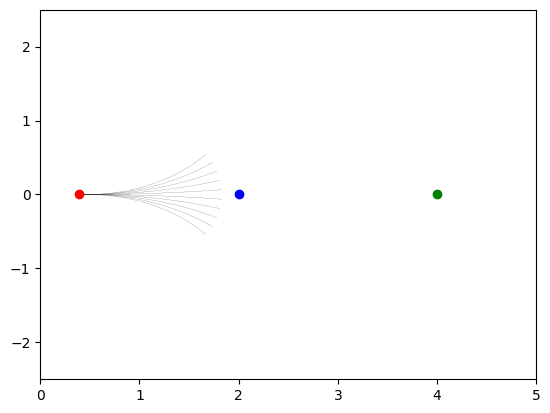

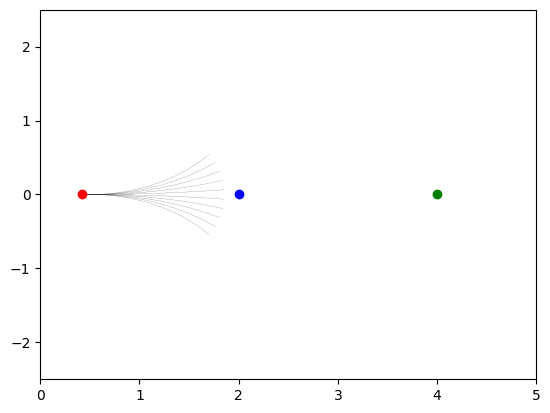

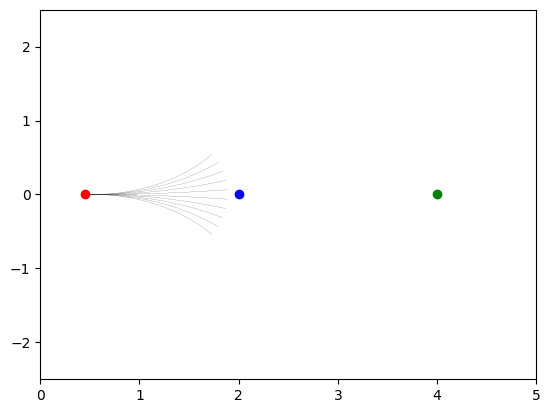

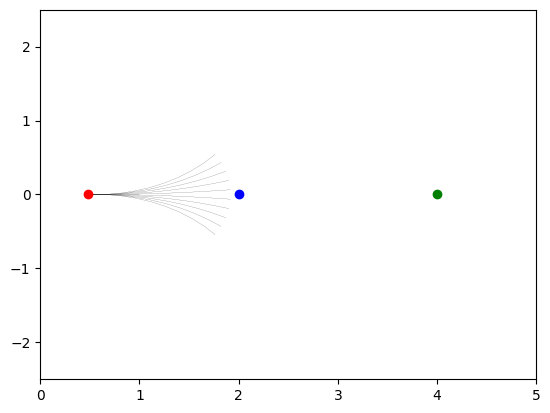

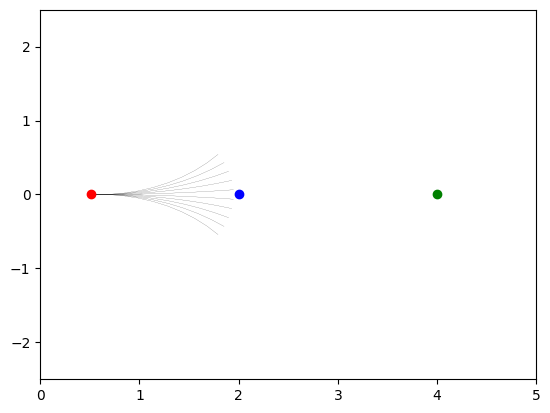

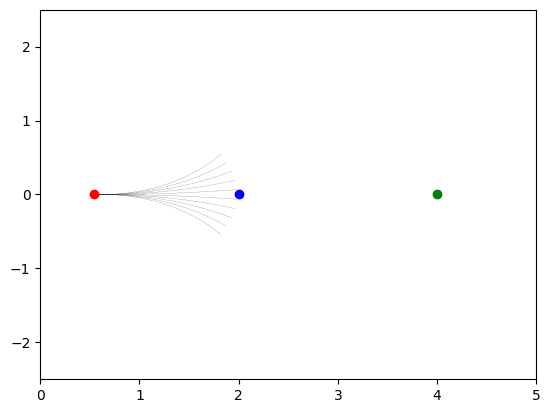

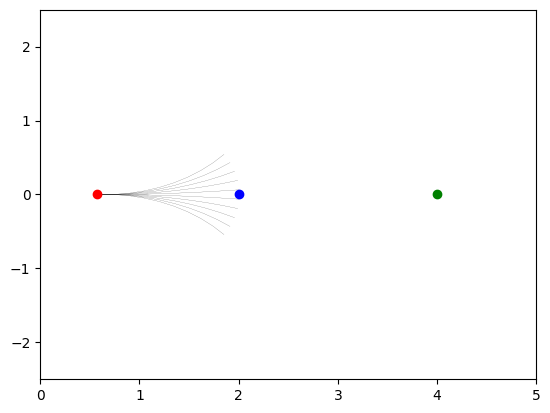

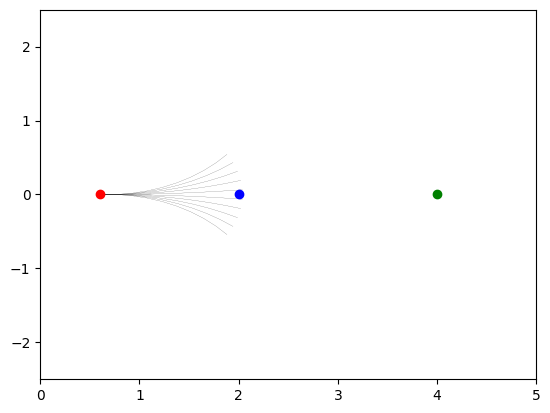

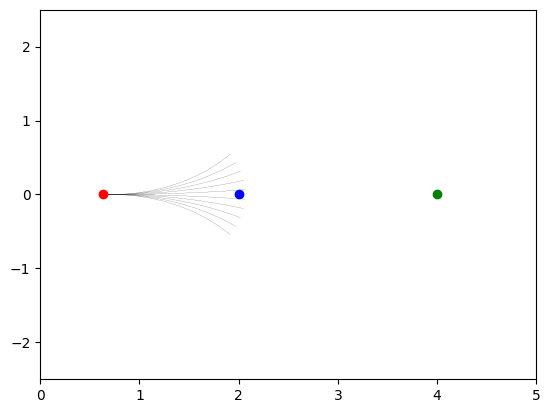

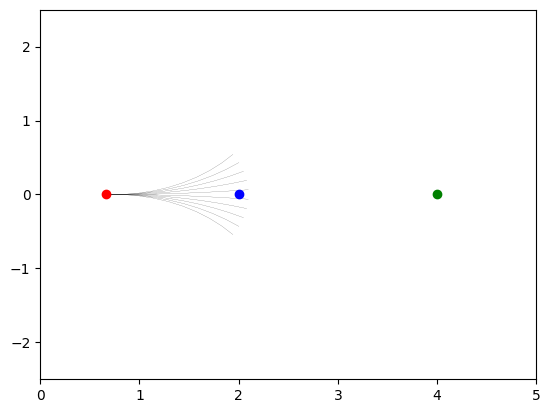

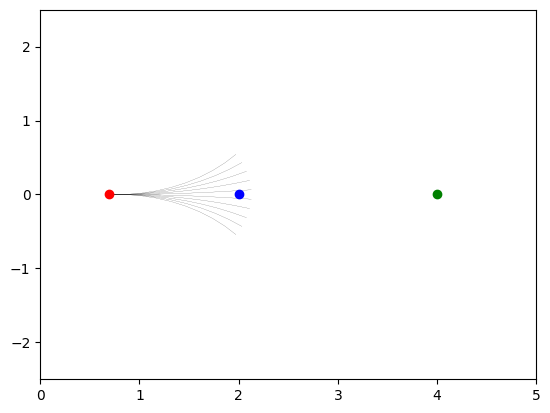

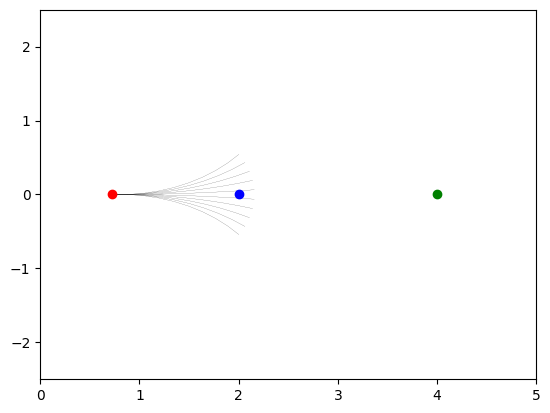

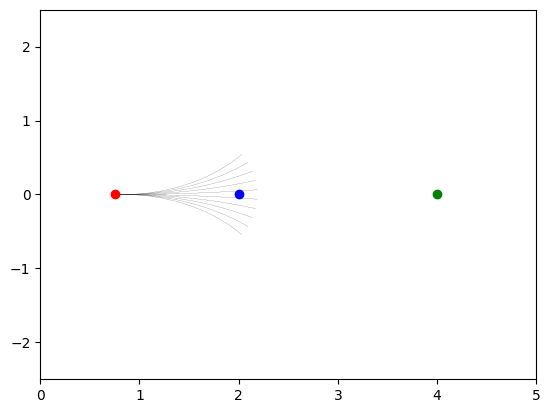

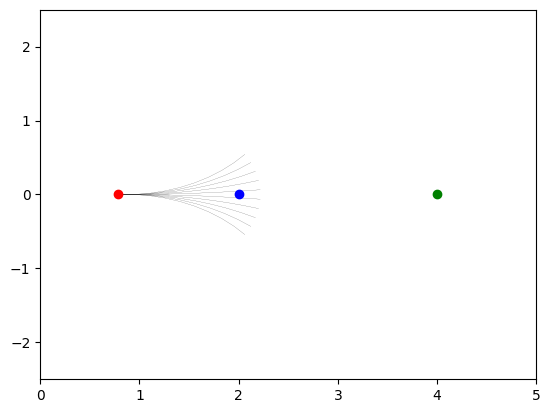

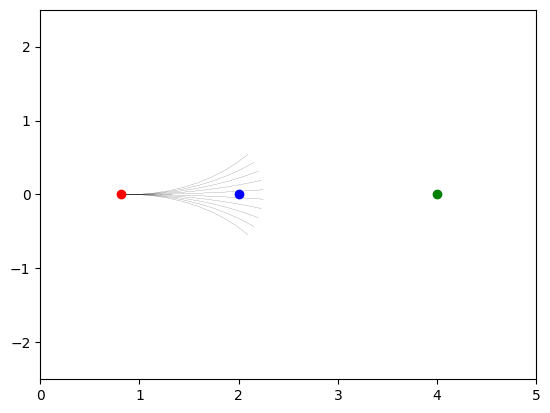

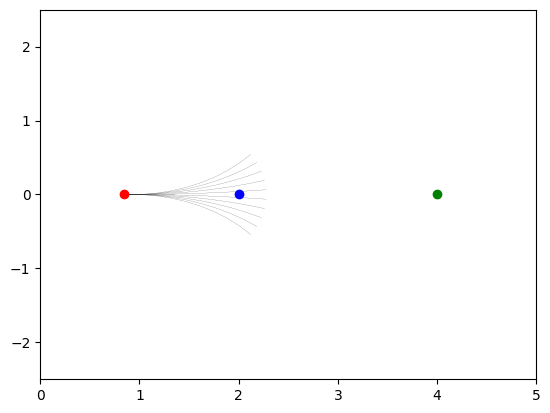

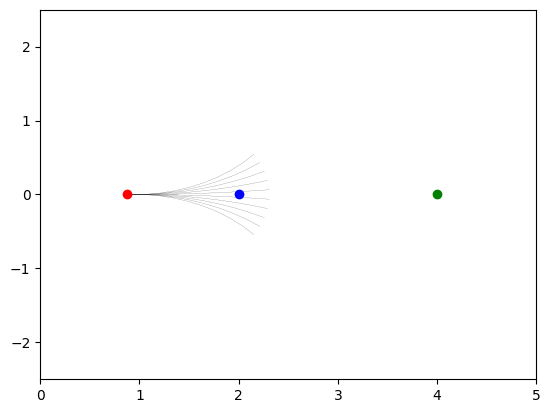

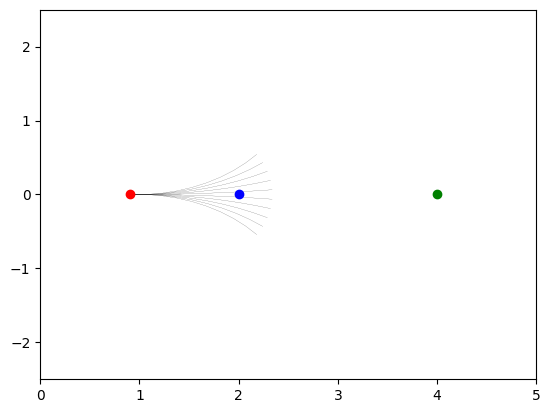

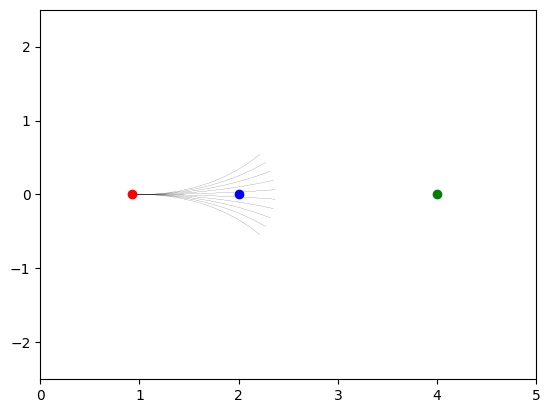

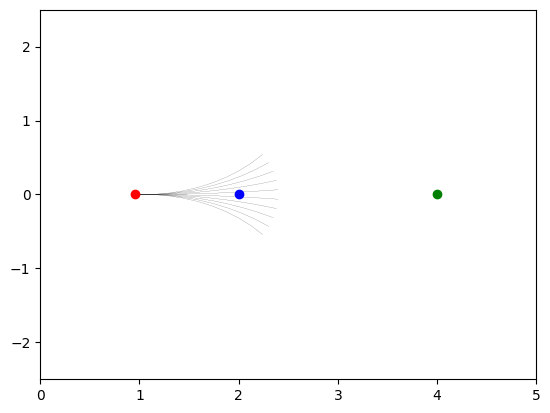

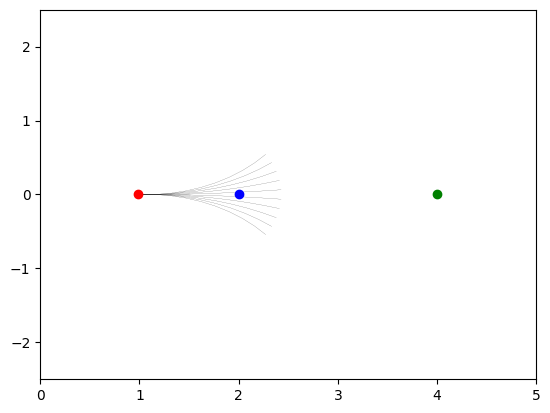

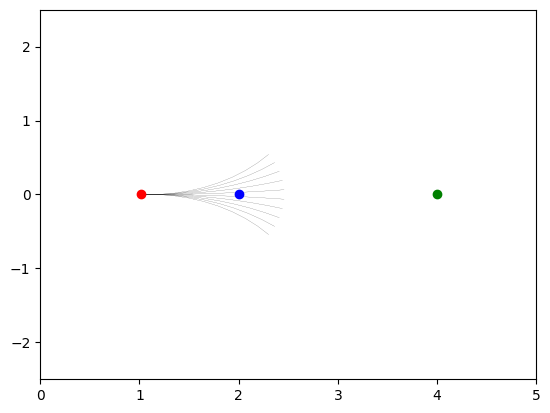

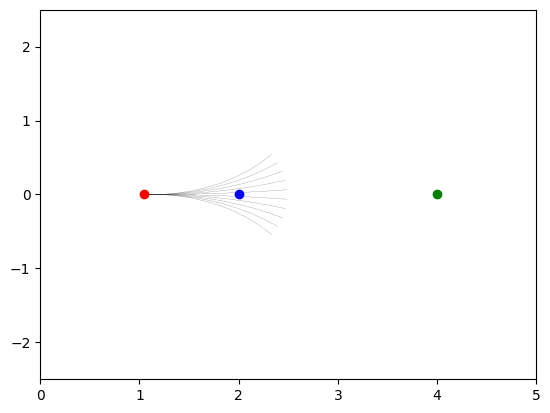

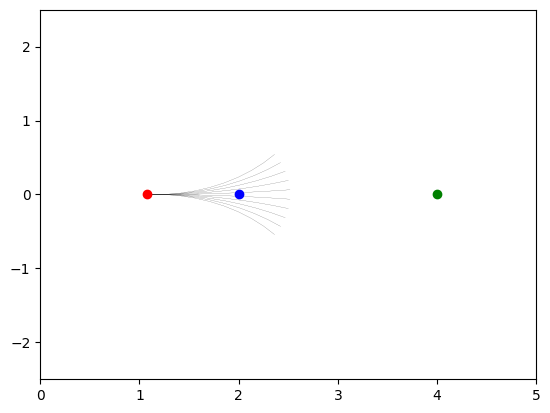

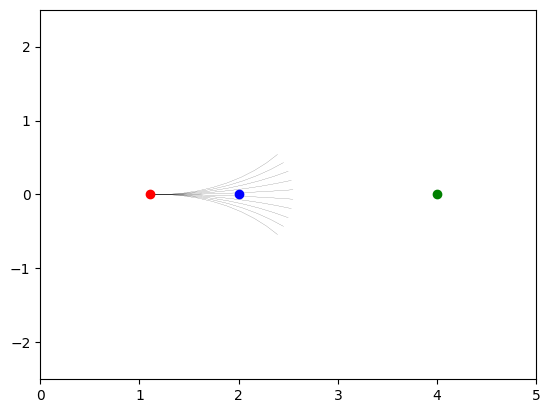

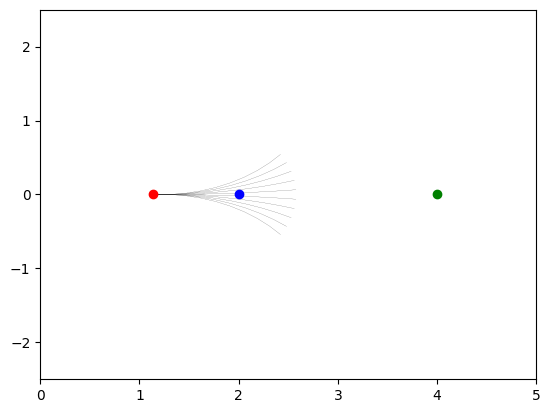

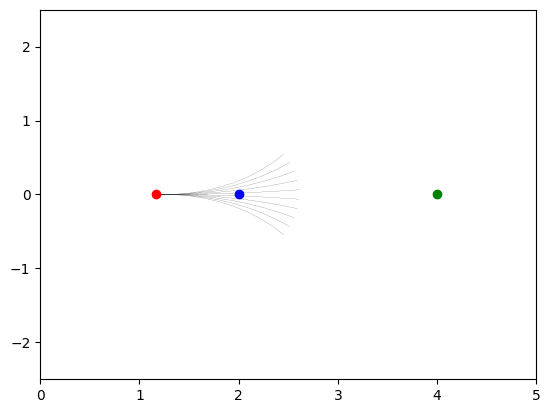

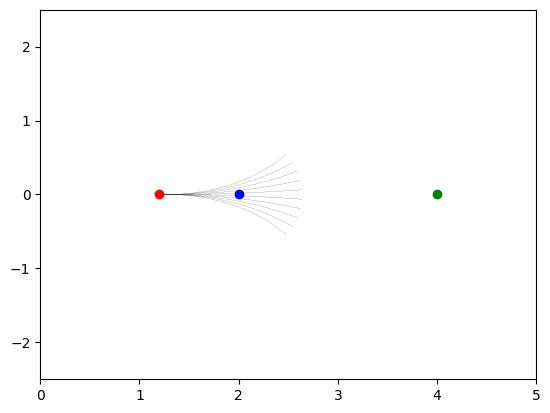

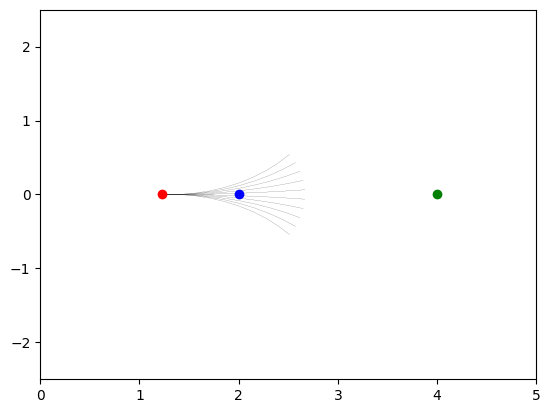

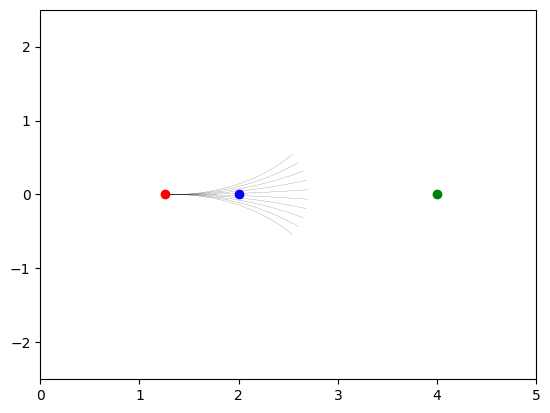

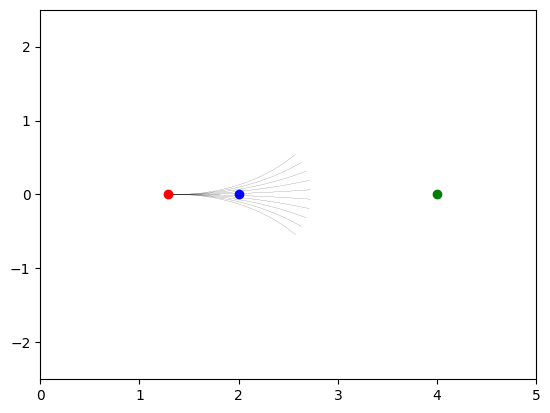

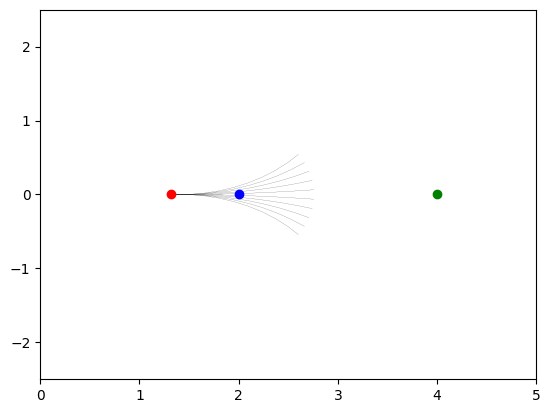

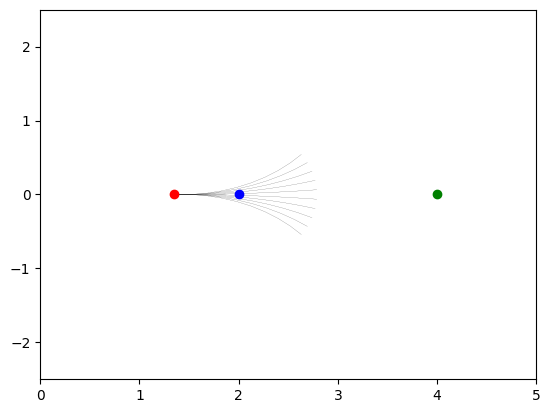

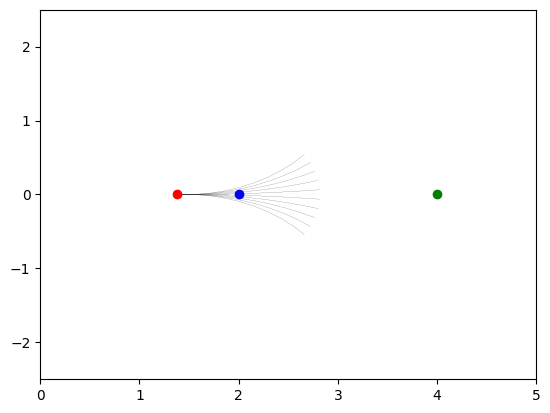

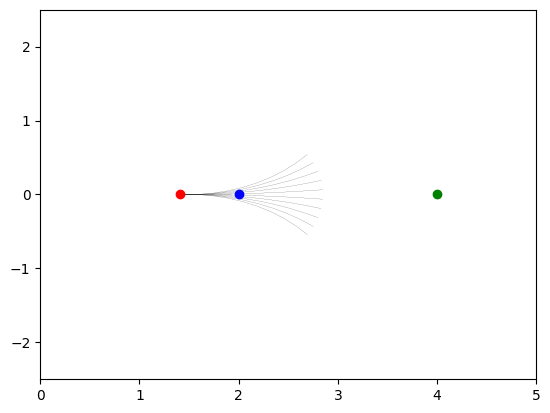

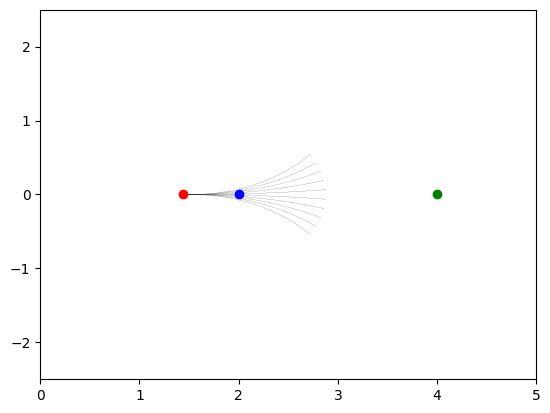

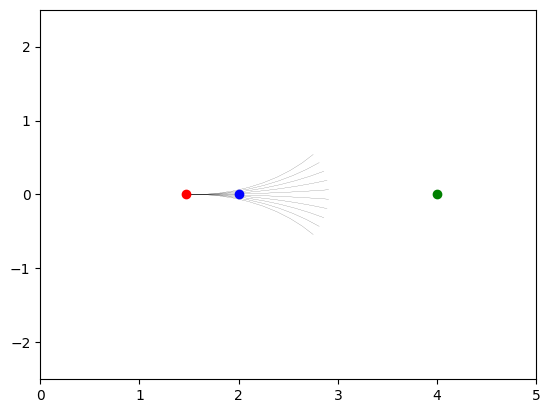

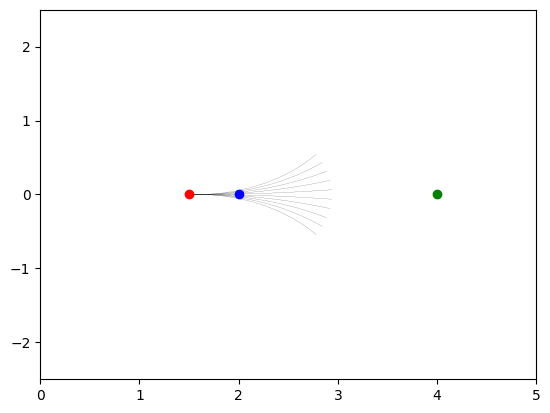

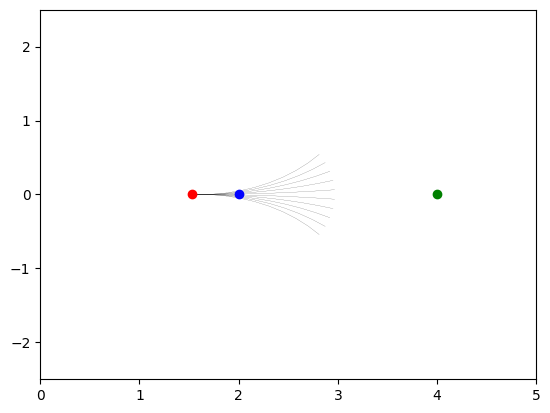

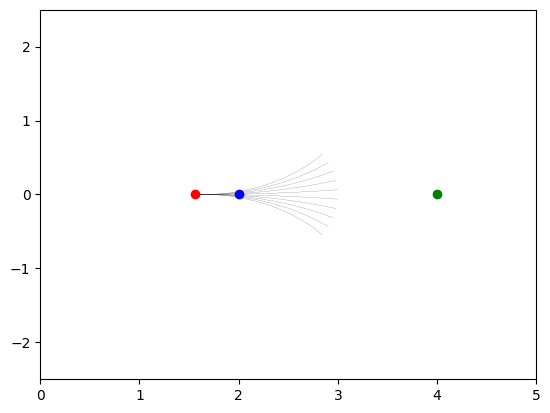

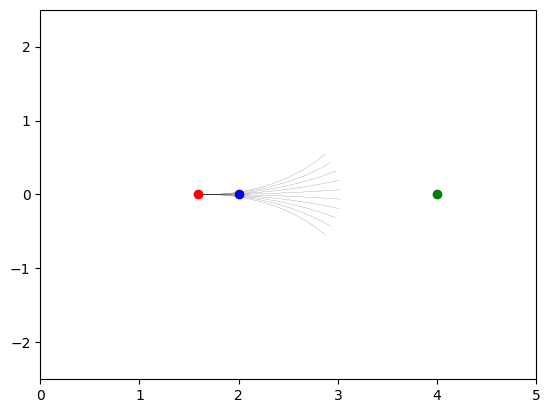

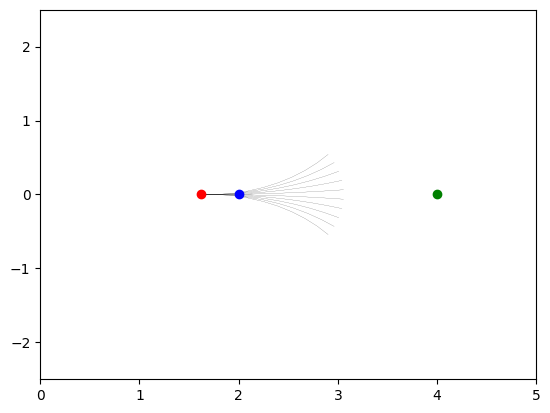

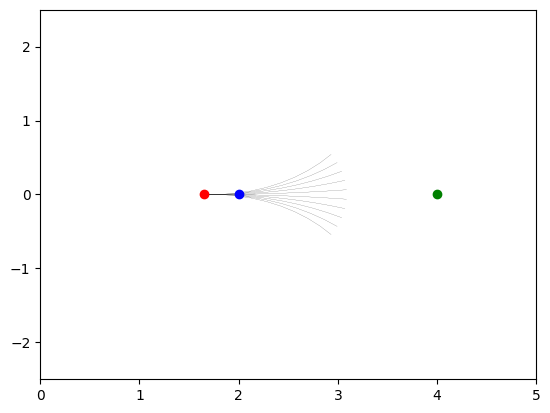

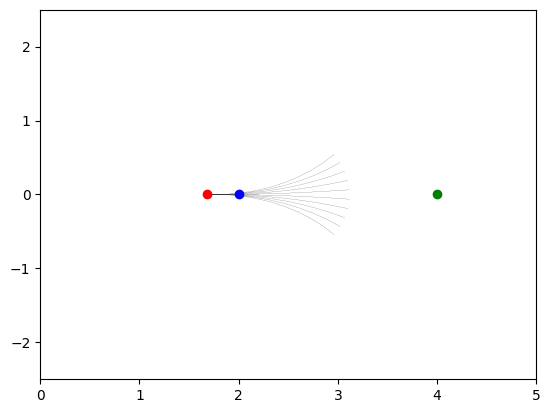

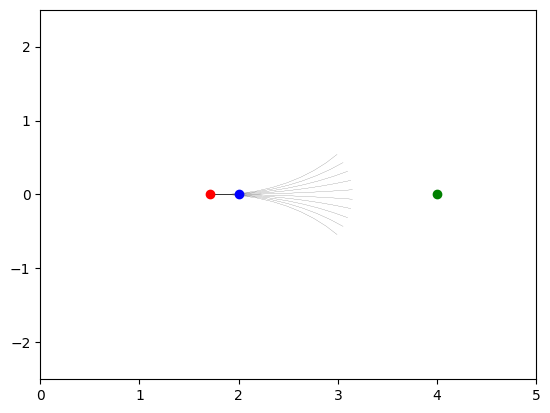

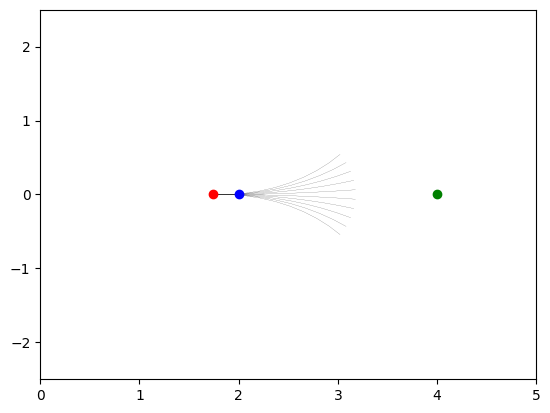

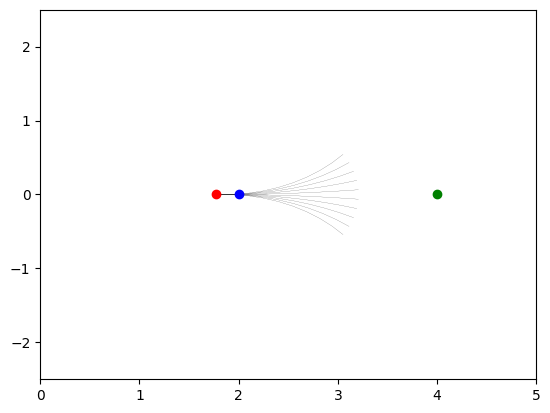

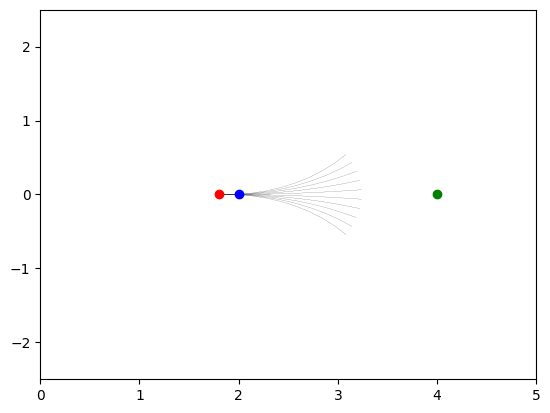

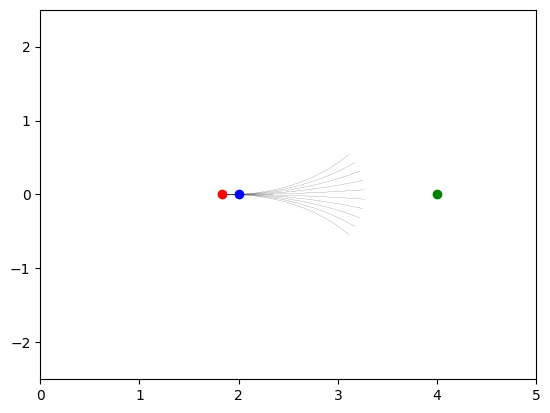

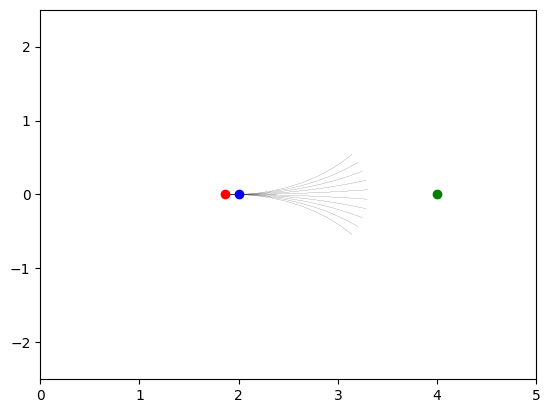

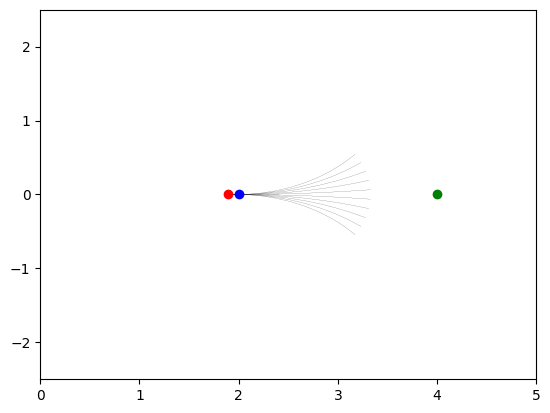

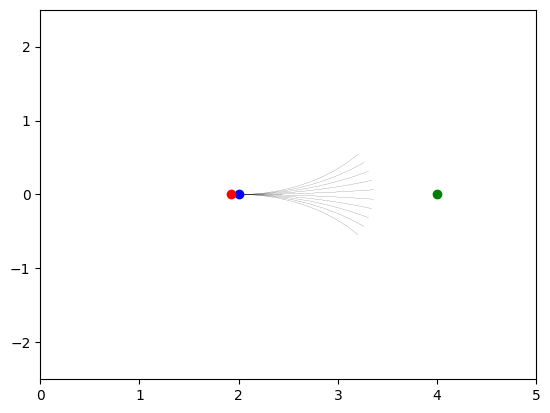

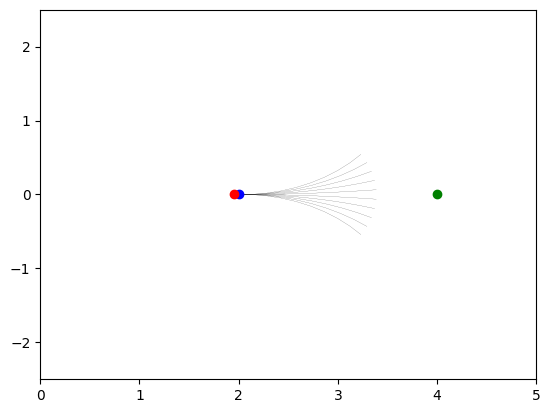

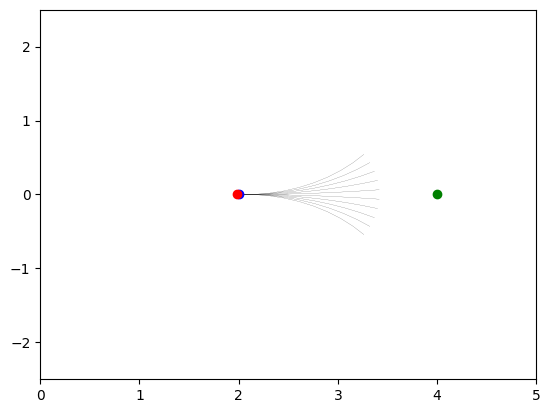

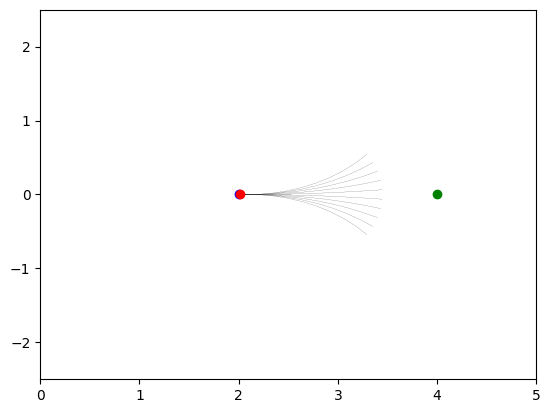

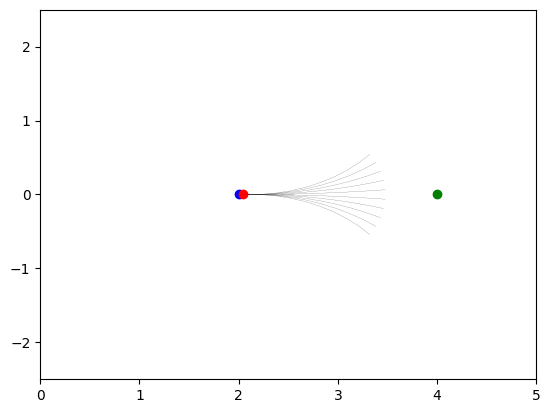

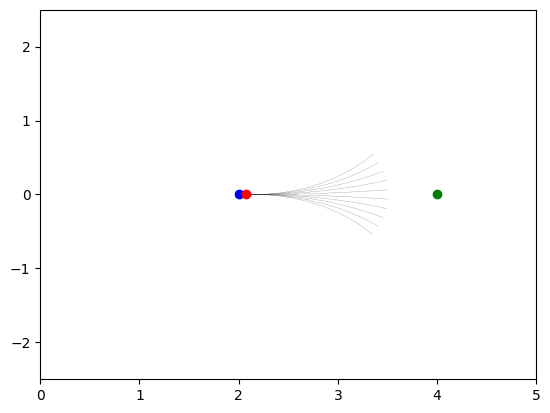

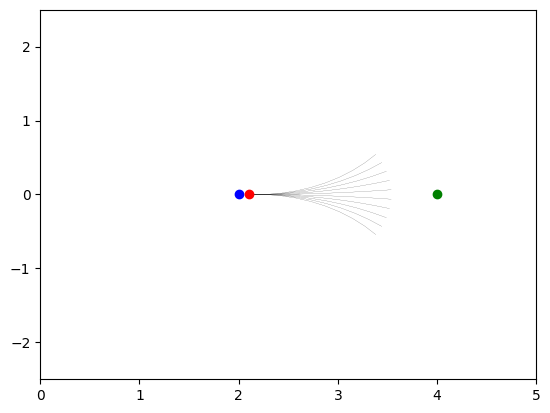

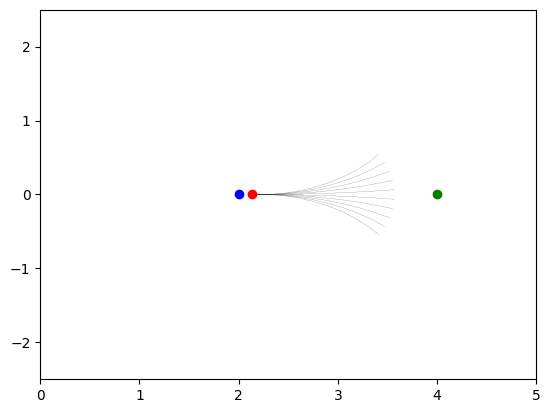

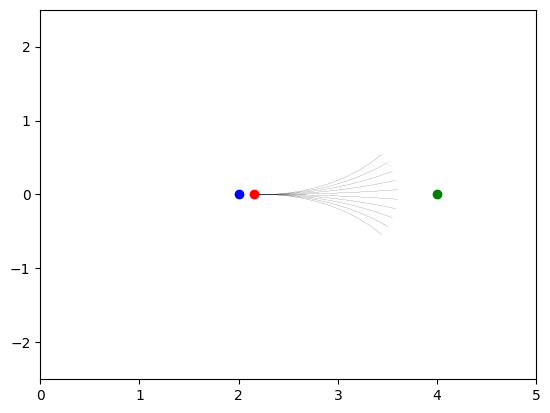

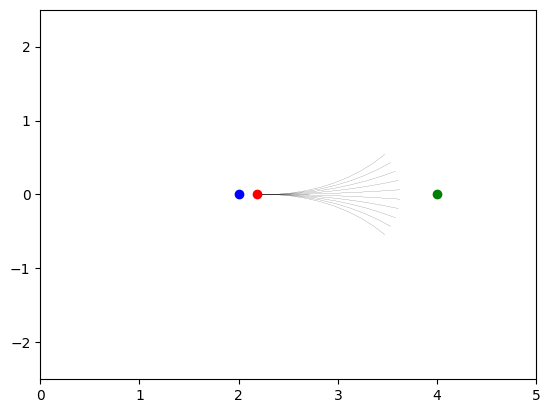

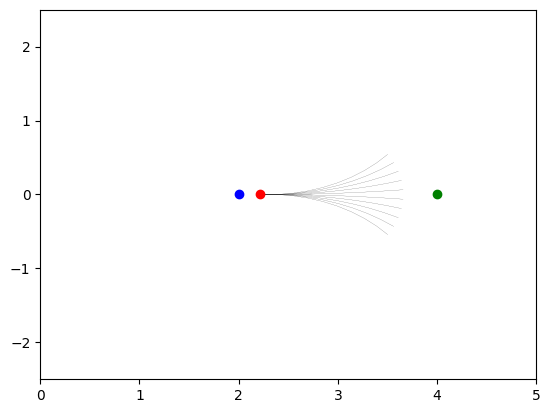

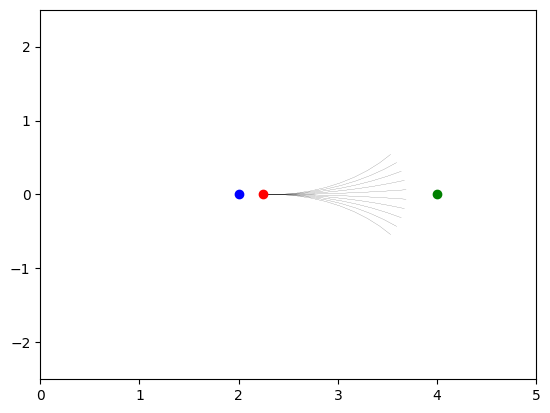

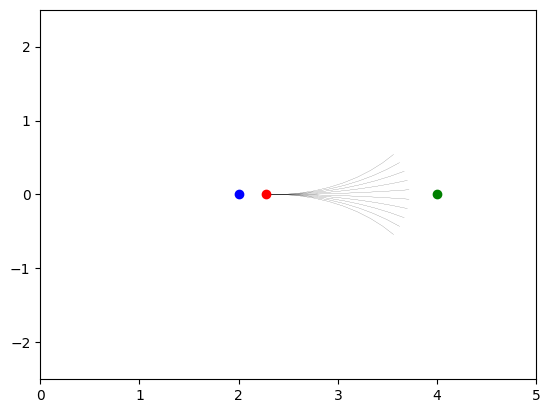

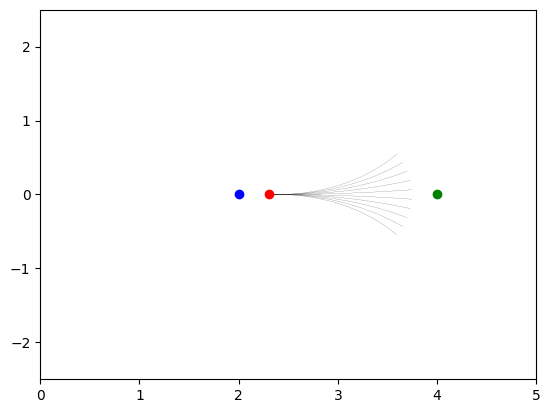

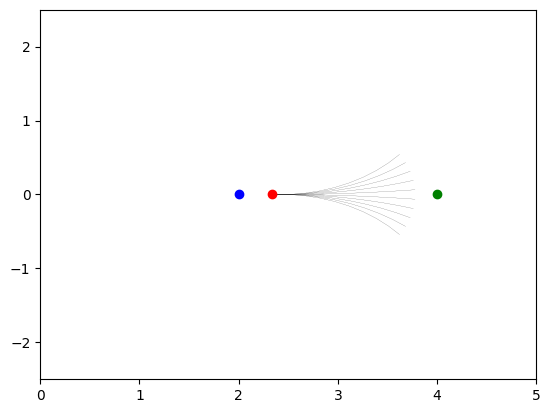

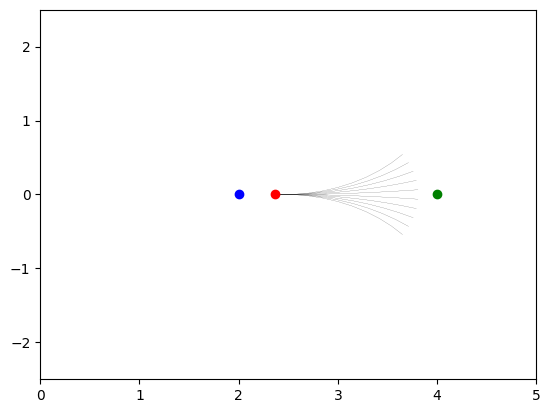

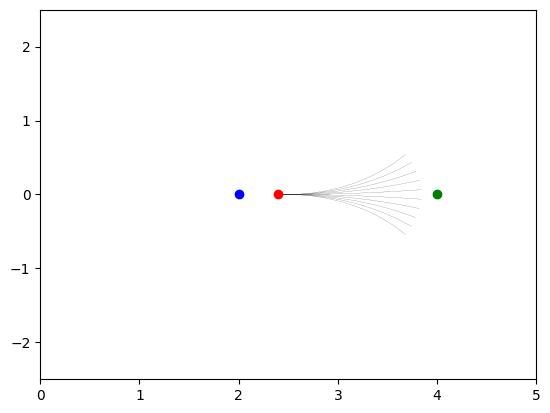

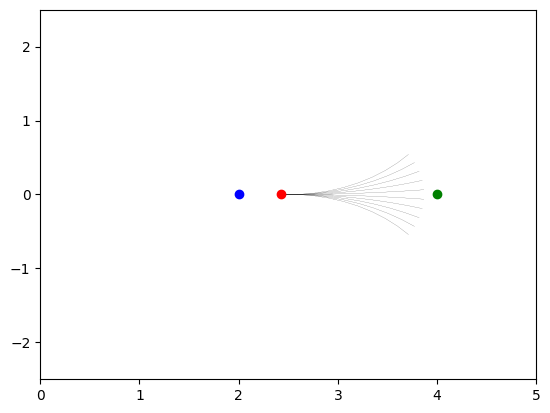

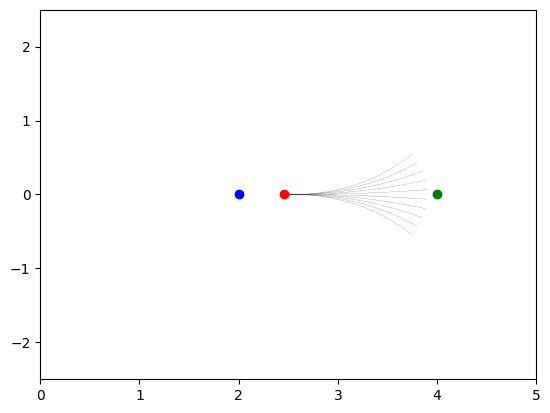

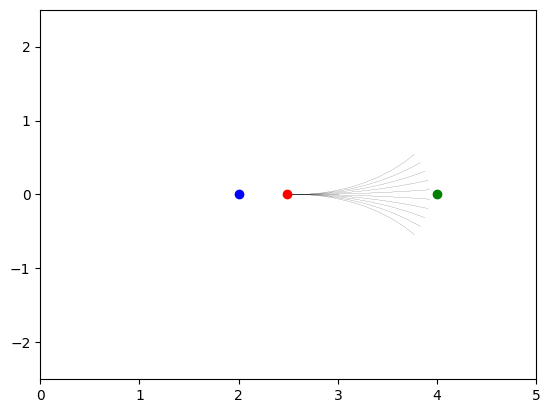

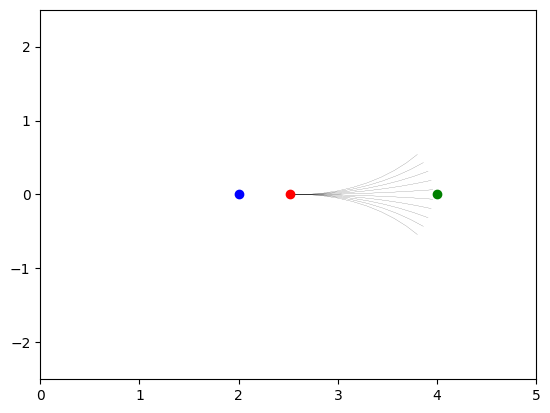

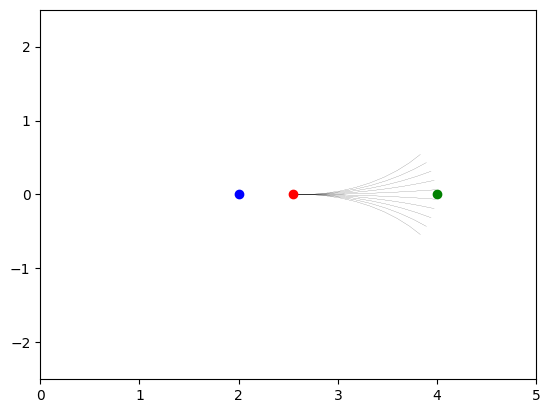

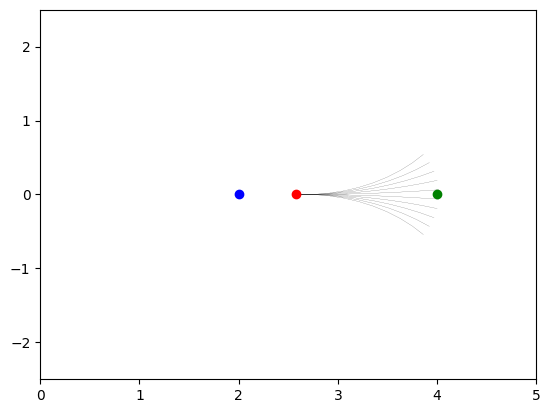

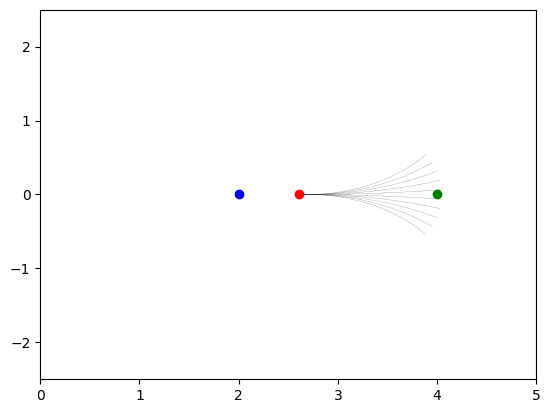

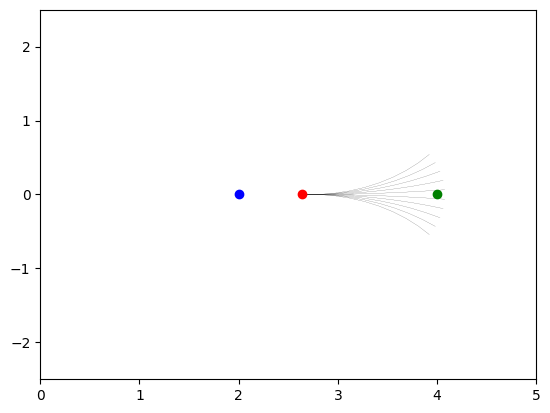

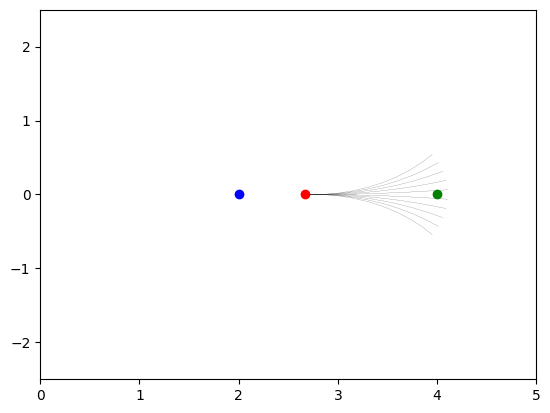

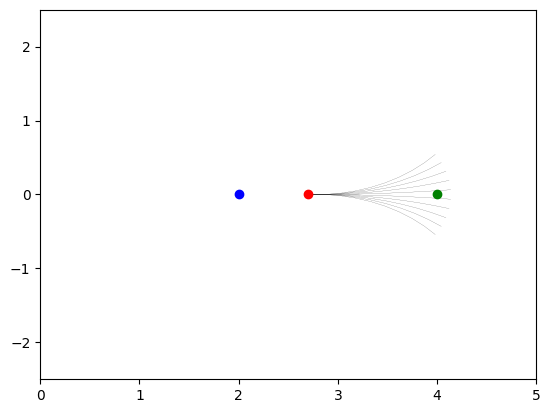

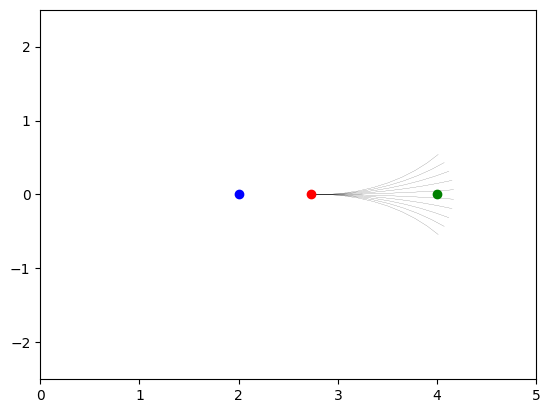

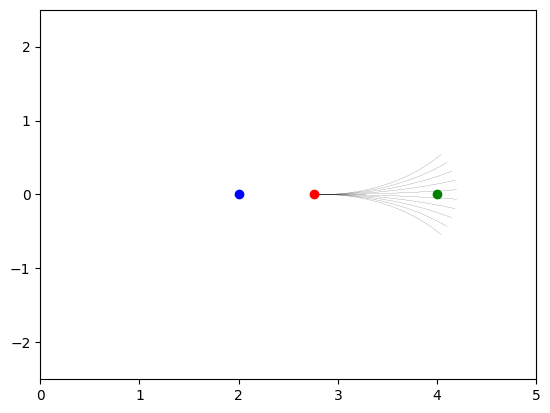

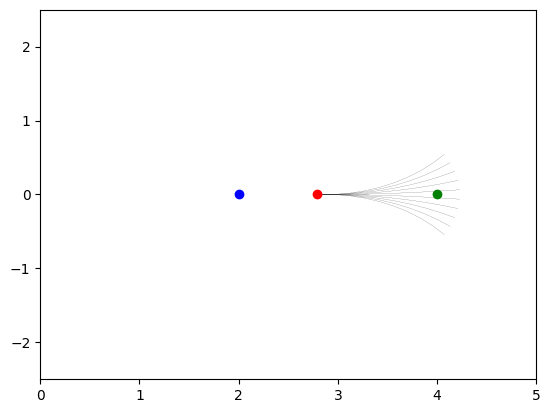

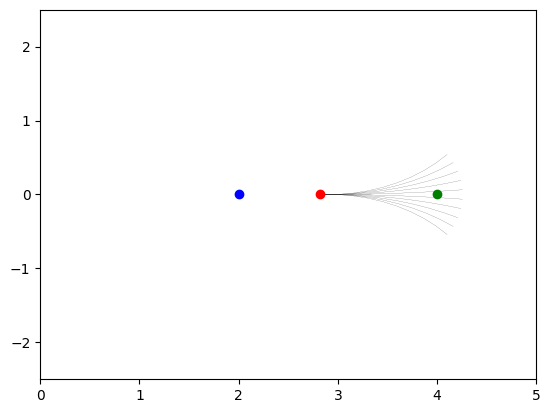

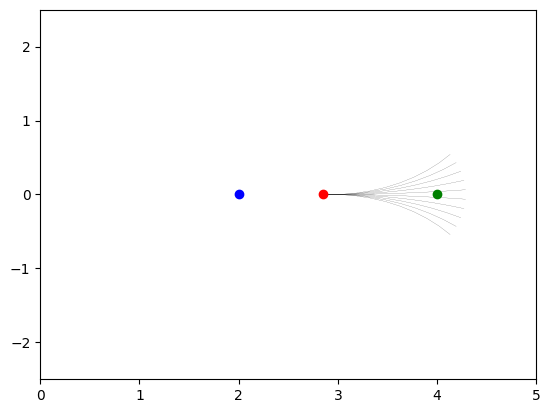

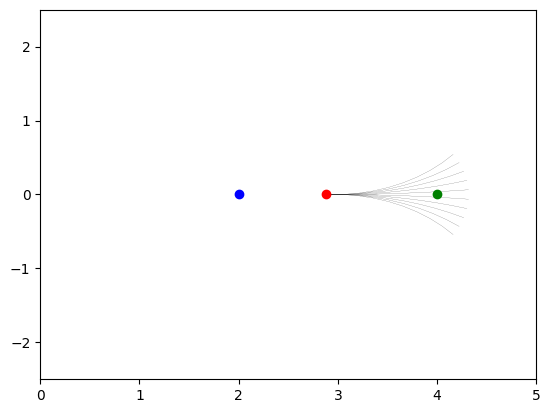

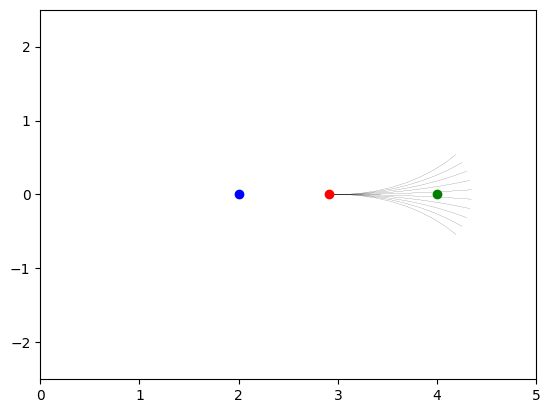

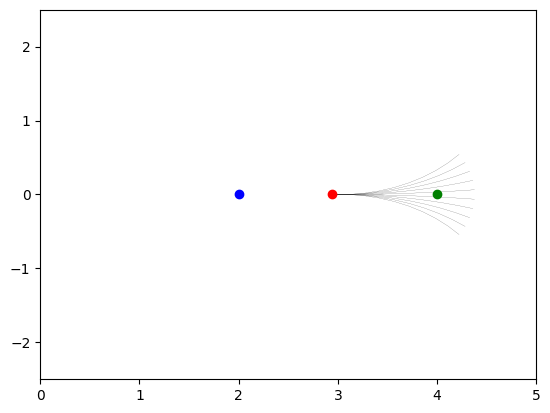

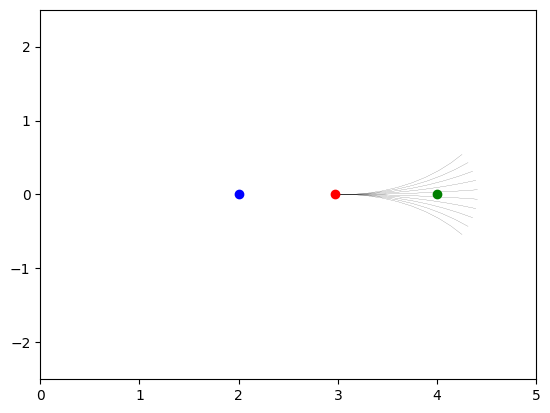

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class dwa():
  def __init__(self):
    self.pre_time = 0

  def plot_defaults(self):
    self.obstacle()
    self.goal()

  def goal(self):
    plt.scatter(4, 0, color = 'green')

  def obstacle(self):
    plt.scatter(2,0, color = 'blue')

  def odometry(self, velo, angle_velo, angle, preX, preY, dt):
    next_x = velo * dt * np.cos(angle) + preX
    next_y = velo * dt * np.sin(angle) + preY
    next_angle = angle_velo * dt + angle
    return next_x, next_y, next_angle

  def predict_future_states(self, velo, angle_velo, robot_x, robot_y, robot_angle):
    pred_x, pred_y, angle = robot_x, robot_y, robot_angle
    pltList = []
    pre_time = 0
    for pred_time in np.arange(0, 2, 0.2):
      dt = pred_time - pre_time
      pred_x, pred_y, angle = self.odometry(velo, angle_velo, angle, pred_x, pred_y, dt)
      pltList.append([pred_x, pred_y])
      pre_time = pred_time

    pltList = np.array(pltList)
    plt.plot(pltList[:,0], pltList[:,1], c = 'black', zorder = 0, lw = 0.1)
    #plt.scatter(pltList[:,0], pltList[:,1])

  def conditions(self, robot_x, robot_y, robot_angle):
    velo = 0.8
    num_tracks = 10
    max_angle_velo = 0.5
    min_angle_velo = -0.5
    interval = abs((max_angle_velo - min_angle_velo) / num_tracks)
    angle_velo = 0
    wRange = np.linspace(min_angle_velo, max_angle_velo, num_tracks)
    for w in wRange:
      #print(w)
      angle_velo = w
      self.predict_future_states(velo, angle_velo, robot_x, robot_y, robot_angle)

  def update(self):
    robot_state = []
    velo = 0.1
    angle_velo = 0
    robot_angle = 0
    robot_x, robot_y = 0, 0
    for time in np.arange(0, 30, 0.3):
      dt = time - self.pre_time
      self.plot_defaults()
      robot_x, robot_y, robot_angle = self.odometry(velo, angle_velo, robot_angle, robot_x, robot_y, dt)
      plt.scatter(robot_x, robot_y, color = 'red', zorder = 1)
      self.conditions(robot_x, robot_y, robot_angle)
      plt.xlim(0, 5)
      plt.ylim(-2.5, 2.5)
      plt.show()

      self.pre_time = time

def main():
  DWA = dwa()
  DWA.update()
  #print(pltList)

if __name__ == '__main__':
    main()